In [2]:
import tensorflow as tf

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

4431872/4422102 [==============================] - 0s 0us/step
60000 10000


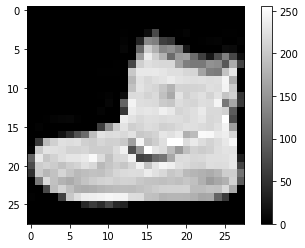

9


In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [10]:
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

2021-12-31 09:02:56.414980: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-31 09:02:56.415193: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3819 - accuracy: 0.8645 - val_loss: 0.3975 - val_accuracy: 0.8595
Epoch 2/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3789 - accuracy: 0.8662 - val_loss: 0.3996 - val_accuracy: 0.8591
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3767 - accuracy: 0.8672 - val_loss: 0.3936 - val_accuracy: 0.8587
Epoch 4/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3737 - accuracy: 0.8674 - val_loss: 0.3948 - val_accuracy: 0.8587
Epoch 5/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3720 - accuracy: 0.8688 - val_loss: 0.3939 - val_accuracy: 0.8589
Epoch 6/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3692 - accuracy: 0.8701 - val_loss: 0.3933 - val_accuracy: 0.8605
Epoch 7/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3663 - accuracy: 0.8700 - val_loss: 0.3897 - val_accuracy:

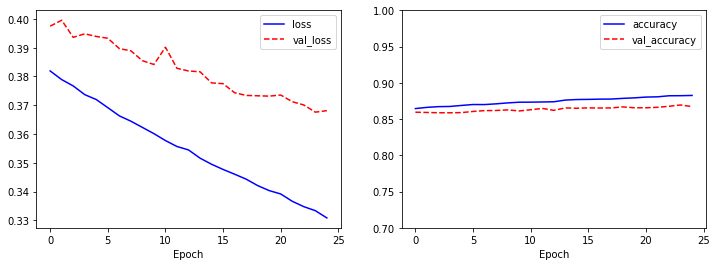

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [17]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 4ms/step - loss: 0.3936 - accuracy: 0.8610


[0.3936309814453125, 0.8610000610351562]